## *Elements of Machine Learning* 2023
## Alan Reyes-Figueroa

# Centrar datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd                # trabajar bases de datos (DataFrame)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read data

In [3]:
df = sns.load_dataset('penguins')       # importar el conjunto de datos

In [4]:
df.shape

(344, 7)

## DataFrame exploration

In [5]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
df = df.dropna()

In [7]:
data = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [8]:
X = data.values
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [9]:
data.mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

In [10]:
mu = X.mean(axis=0)
mu

array([  43.99279279,   17.16486486,  200.96696697, 4207.05705706])

In [11]:
data_centered = data.copy()

In [12]:
data_centered['bill_length_mm'] = data['bill_length_mm'] - mu[0]
data_centered['bill_depth_mm'] = data['bill_depth_mm'] - mu[1]
data_centered['flipper_length_mm'] = data['flipper_length_mm'] - mu[2]
data_centered['body_mass_g'] = data['body_mass_g'] - mu[3]

In [13]:
data_centered

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-4.892793,1.535135,-19.966967,-457.057057
1,-4.492793,0.235135,-14.966967,-407.057057
2,-3.692793,0.835135,-5.966967,-957.057057
4,-7.292793,2.135135,-7.966967,-757.057057
5,-4.692793,3.435135,-10.966967,-557.057057
...,...,...,...,...
338,3.207207,-3.464865,13.033033,717.942943
340,2.807207,-2.864865,14.033033,642.942943
341,6.407207,-1.464865,21.033033,1542.942943
342,1.207207,-2.364865,11.033033,992.942943


<Figure size 1440x432 with 0 Axes>

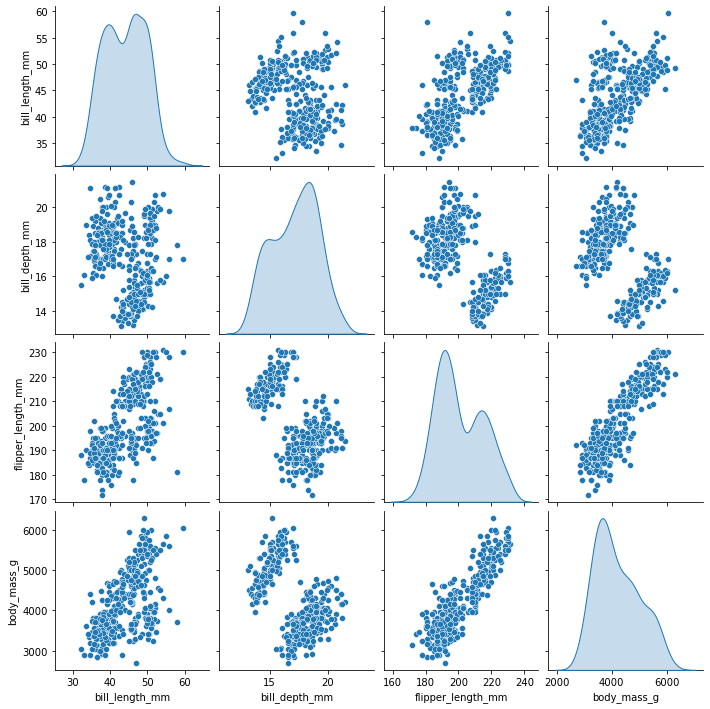

In [14]:
plt.figure(figsize=(20,6))
sns.pairplot(data=data, diag_kind='kde')
plt.show()

<Figure size 1440x432 with 0 Axes>

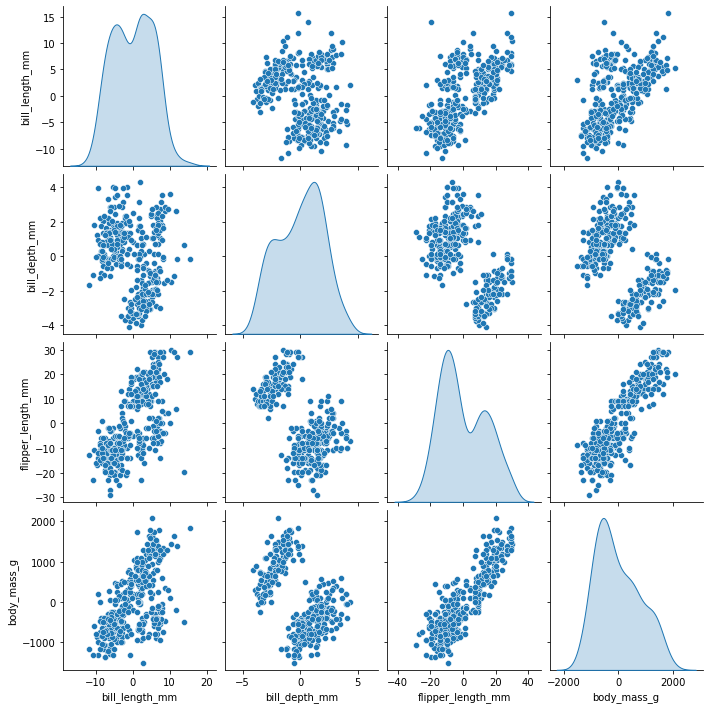

In [15]:
plt.figure(figsize=(20,6))
sns.pairplot(data=data_centered, diag_kind='kde')
plt.show()

In [16]:
data_centered.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,8.065620e-15,1.498968e-15,-2.253253e-14,7.237721e-13
std,5.468668e+00,1.969235e+00,1.401577e+01,8.052158e+02
min,-1.189279e+01,-4.064865e+00,-2.896697e+01,-1.507057e+03
25%,-4.492793e+00,-1.564865e+00,-1.096697e+01,-6.570571e+02
50%,5.072072e-01,1.351351e-01,-3.966967e+00,-1.570571e+02
75%,4.607207e+00,1.535135e+00,1.203303e+01,5.679429e+02
max,1.560721e+01,4.335135e+00,3.003303e+01,2.092943e+03


In [17]:
data_centered.mean()

bill_length_mm       8.065620e-15
bill_depth_mm        1.498968e-15
flipper_length_mm   -2.253253e-14
body_mass_g          7.237721e-13
dtype: float64